## Laboratorio 3: Modelo lineal Bayesiano

### Manuel Felipe Pineda

- Consulte para que sirven los comandos randn, normpdf, mvnrnd, y mvnpdf de MatLab.

    R: 
    
    *randn* retorna un escalar tomado de una distribucion normal
    
    *normpdf* calcula la funcion de densidad de probabilidad para un X dado
    
    *mvnrnd* es la version multivariada de randn
    
    *mvnpdf* es la version multivariada de normpdf

- Con base en la funcion de MatLab provista para la solucion del Laboratorio 2 (modelo lineal para minimos cuadrados), genere su funcion de modelo lineal utilizando maxima verosimilitud como funcion de costo con pdf Gaussiana.

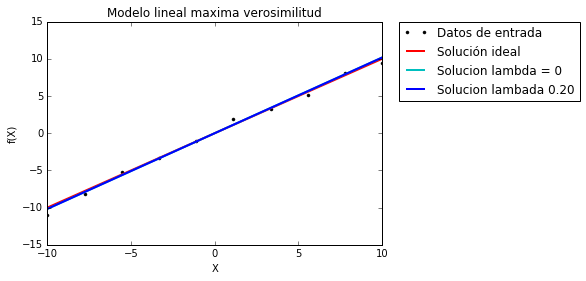

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


# W usando maxima verosimilitud. 
# Se llega a la misma forma de minimos cuadrados
def W_ML(X, y, l = 0.0): 
    C = X.transpose().dot(X)
    s = X.shape[1]
    T = np.linalg.pinv(C + l * np.eye(s, s))
    w =  T.dot(X.transpose()).dot(y)
    ye = X.dot(w)
    return [ye, w, C]


import scipy.spatial as ss

def agauss(X, mu, sig = None):
    if (sig == None):
        sig = np.median(ss.distance.squareform(ss.distance.cdist(X, mu)))
    D = ss.distance.cdist(X, mu)
    phi = np.exp(-(D ** 2) / (2 * (sig ** 2)))
    return phi

def plot_with_phi(x, y, X, Y, phi, yn):
    def lcurva(phi, Y):
        # TODO: implement l-curve
        return [0.2, 1]

    [ye0, w, C0] = W_ML(phi, yn)
    [la, M] = lcurva(phi, Y)
    ye = W_ML(phi, yn, la)[0]

    plt.plot(x, yn, 'k.', label = 'Datos de entrada')
    plt.plot(x, y, 'r', linewidth = 2, label = 'Solución ideal')
    plt.plot(x, ye0[:,0], 'c', linewidth = 2, label = 'Solucion lambda = 0')
    plt.plot(x, ye, 'b', linewidth = 2, label = 'Solucion lambada %.2f' % la)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Modelo lineal maxima verosimilitud')
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.show()


def gen_lineal_data(a, b, c):
    x = np.linspace(a, b, c)
    X = np.array([x]).T
    y = x
    Y = np.array([y]).T
    varn = 0.7;
    noise = np.random.normal(0, varn, size=len(y))
    noise = np.array([noise]).T
    yn = Y + noise
    return [x, y, yn, X, Y]

def gen_data(a, b, c, varn):
    x = np.linspace(a, b, c)
    X = np.array([x]).T
    y = np.sinc(x)
    Y = np.array([y]).T
    noise = np.random.normal(0, varn, size=len(y))
    noise = np.array([noise]).T
    yn = Y + noise
    return [x, y, yn, X, Y]
    
    
def plot_lineal_approx(a, b, c, LF): # Plots sinc approximation using LF latent functions
    [x, y, yn, X, Y] = gen_lineal_data(a, b, c)    
    plot_with_phi(x, y, X, Y, X, yn)

plot_lineal_approx(-10, 10, 10, 30)

- Obtenga la solucion de maxima verosimilitud para la funcion sinc(x) del Laboratorio 2 asumiendo dos condiciones diferentes de ruido (diferentes varianzas para el ruido blanco Gaussiano) y grafique la verosimilitud del modelo lineal asumiendo una distribucion Gaussiana (Asuma la funcion de representacion no lineal de su preferencia: polinomial, Guassiana, sigmoide).

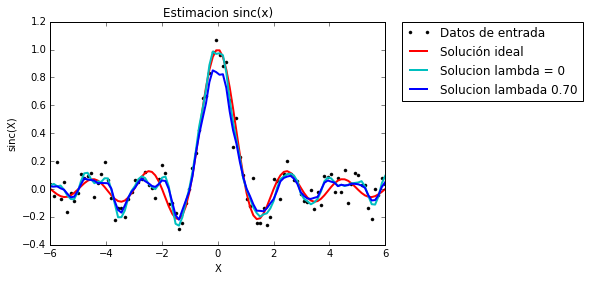

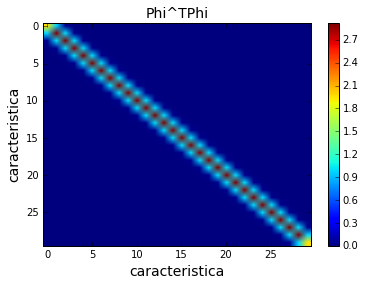

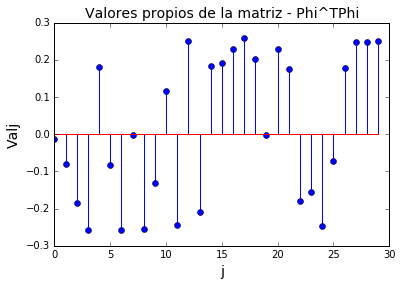

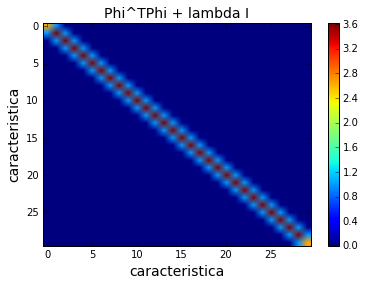

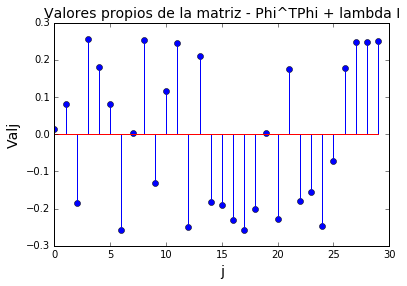

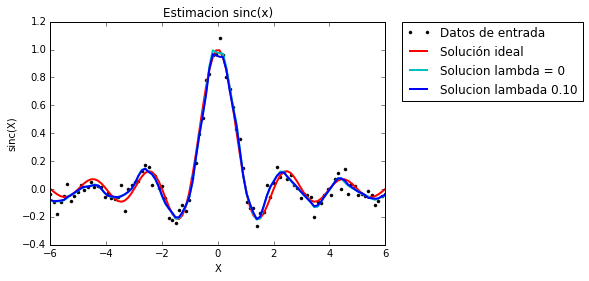

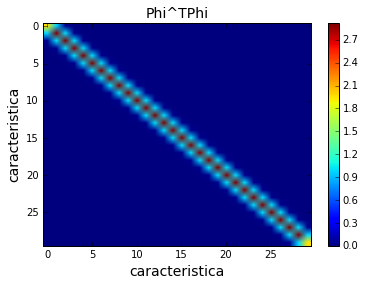

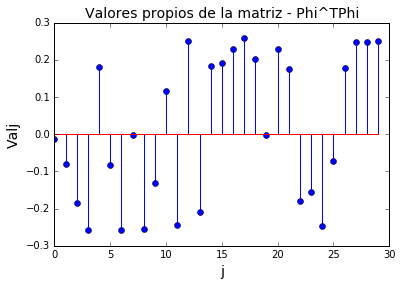

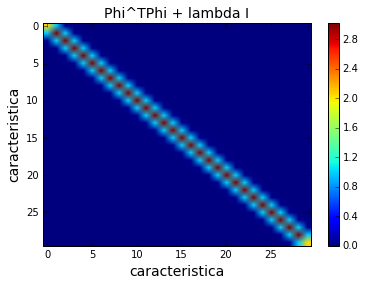

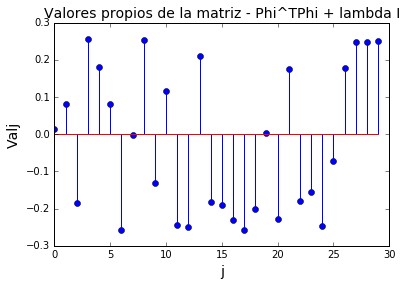

In [2]:

def plot_extra(x, y, X, Y, phi, yn, ye0, ye, la):
    C0 = phi.transpose().dot(phi)
    plt.plot(x, yn, 'k.', label = 'Datos de entrada')
    plt.plot(x, y, 'r', linewidth = 2, label = 'Solución ideal')
    plt.plot(x, ye0[:,0], 'c', linewidth = 2, label = 'Solucion lambda = 0')
    plt.plot(x, ye, 'b', linewidth = 2, label = 'Solucion lambada %.2f' % la)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Estimacion sinc(x)')
    plt.xlabel('X')
    plt.ylabel('sinc(X)')
    plt.show()
    
    plt.imshow(C0, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi', fontsize = 14)
    plt.show()

    w, Val0 = np.linalg.eig(C0)
    plt.stem(np.diag(Val0))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi', fontsize = 14)
    plt.show()

    CReg = C0 + la * np.eye(len(C0))
    w, Val1 = np.linalg.eig(CReg)

    plt.imshow(CReg, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi + lambda I', fontsize = 14)
    plt.show()

    plt.stem(np.diag(Val1))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi + lambda I', fontsize = 14)
    plt.show()
    

def w_ML(X, Y, la = None): #computes w using maximum likelihood estimator
    if (la == None):
        la = 0.5
    C = X.transpose().dot(X)
    s = X.shape[1]
    D = np.linalg.inv(C + la * np.eye(s, s))
    return D.dot(X.transpose()).dot(Y)

def beta_inv_ML(X, Y, w = None): #computes $\betha$ using maximum likelihood estimator
    if (not (w is None)):
        w = w_ML(X, Y)
    N = X.shape[0]
    a = (Y - X.dot(w))
    return (1.0 / N) * (a.T).dot(a);

def compute_estimate_ML(X, w, sigma):
    y = np.random.normal(X.dot(w), sigma)
    return y

def gen_phi(X, a, b, LF, sig = 0.2):
    mu = np.linspace(a, b, LF)
    mu = np.array([mu]).T
    phi = agauss(X, mu, sig)
    return phi


def ML_estimator(noise_var, alpha):
    [x, y, yn, X, Y] = gen_data(-6, 6, 100, noise_var)
    phi = gen_phi(X, -6, 6, 30)
    w1 = w_ML(phi, yn, 0.0)
    w2 = w_ML(phi, yn, alpha)
    sigma1 = beta_inv_ML(phi, yn, w1)
    sigma2 = beta_inv_ML(phi, yn, w2)
    ye1 = compute_estimate_ML(phi, w1, sigma1)
    ye2 = compute_estimate_ML(phi, w2, sigma2)

    plot_extra(x, y, X, Y, phi, yn, ye1, ye2, alpha)
    
ML_estimator(0.1, 0.7)
ML_estimator(0.05, 0.1)

- Obtenga la solucion de MAP para la funcion sinc(x) del Laboratorio 2 para dos condiciones diferentes de ruido y grafique la distribucion predictiva del modelo lineal asumiendo una distribucion Gaussiana (Asuma la funcion de representacion no lineal de su preferencia: polinomial, Guassiana, sigmoide). Recuerde que para MAP debe asumir o estimar los valores de $\alpha$ y $\beta$

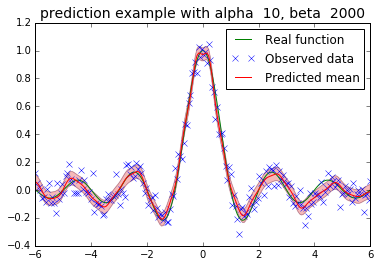

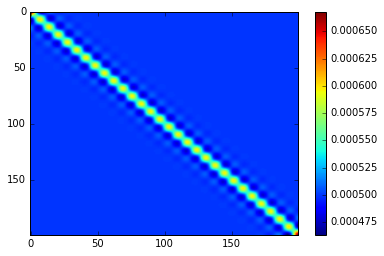

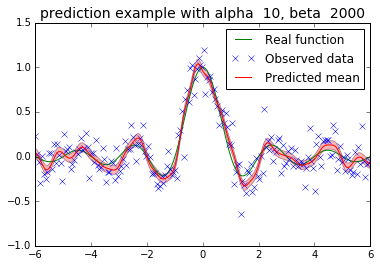

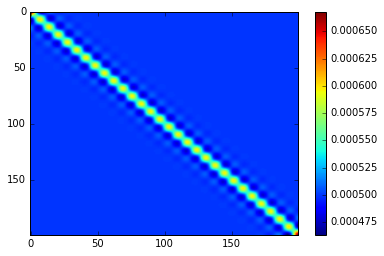

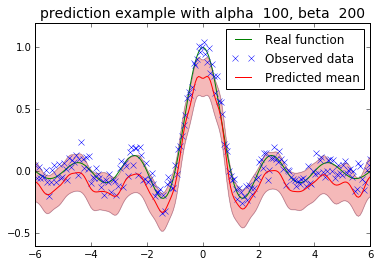

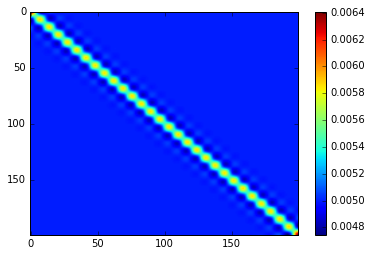

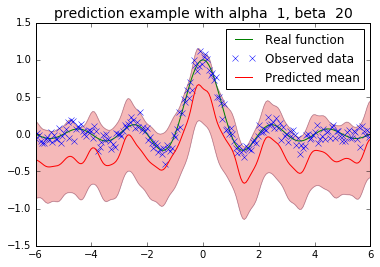

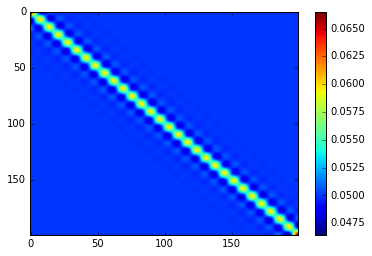

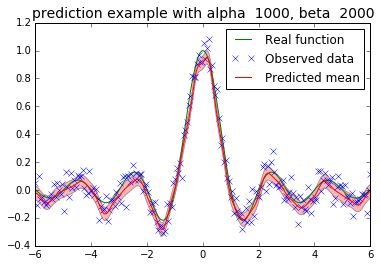

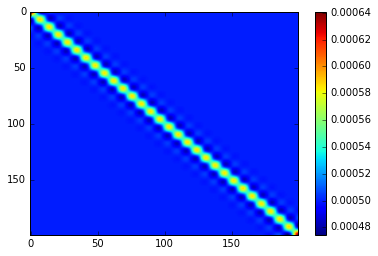

In [39]:
## MAP

import scipy.stats as sst
from numpy.random import multivariate_normal as mnormal_rand
from scipy.stats import multivariate_normal as mnormal
import matplotlib as mpl


def plot_pdf(x, mean, cov, c):
    y = mnormal.pdf(x, mean, cov, 500)
    print(y)
    # plt.axis('equal')
    # plt.plot(x, y, c)

def w_MAP(X, Y, alpha, beta): 
    la = alpha / beta
    C = X.transpose().dot(X)
    s = X.shape[1]
    D = np.linalg.inv(C + la * np.eye(s, s))
    return D.dot(X.transpose()).dot(Y)
       
    
def predictive(alpha, beta, phi, wmap):
    s_i = alpha * np.eye(phi.shape[1]) + beta * phi.T.dot(phi)
    s = np.linalg.inv(s_i)
    sign = 1 / beta + phi.dot(s).dot(phi.T)
    mean = phi.dot(wmap)
    return mean, sign


def plotModel(x, m, v):
    v = np.diag(v)
    upper=m + 2 * np.sqrt(v)
    lower=m - 2 * np.sqrt(v)
    plt.plot(x,m,color="r", label='Predicted mean')
    plt.legend(loc='best')
    plt.fill(np.hstack((x,x[::-1])),np.hstack((upper,lower[::-1])),color=(0.88, 0.10, 0.1),alpha=0.3)
    plt.plot(x,upper,color="#204a87",linewidth=0.2)
    plt.plot(x,lower,color="#204a87",linewidth=0.2)
    
eps = 1e-10

def MAP(noise, alpha = 10, beta = 2000):
    [x, y, yn, X, Y] = gen_data(-6, 6, 200, noise)
    phi = gen_phi(X, -6, 6, 30)
    wmap = w_MAP(phi, yn, alpha, beta)
    mean, cov = predictive(alpha, beta, phi, wmap)
    ye = mnormal_rand(mean[:,0], cov + eps * np.eye(cov.shape[0]))
    plt.title('prediction example with alpha  %d, beta  %d' % (alpha, beta), fontsize = 14)
    plt.plot(x, y, 'g', label="Real function")
    plt.plot(x, yn, 'xb', label="Observed data")
    plotModel(x, ye, cov)
    plt.show()
    plt.imshow(cov, aspect='auto')
    plt.colorbar()
    plt.show()

MAP(0.07)
MAP(0.15)

MAP(0.07, 100, 200)
MAP(0.07, 1, 20)
MAP(0.07, 1000, 2000)

- Realice la aproximacion de alguna variable de interes de una base de datos del repositorio Kaggle. Utilice un modelo lineal regularizado por minimos cuadrados, maxima verosimilitud y MAP.

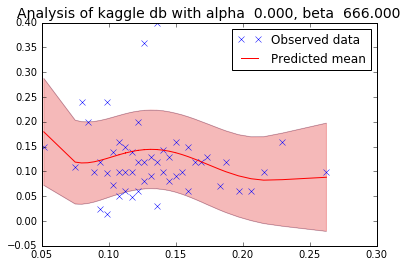

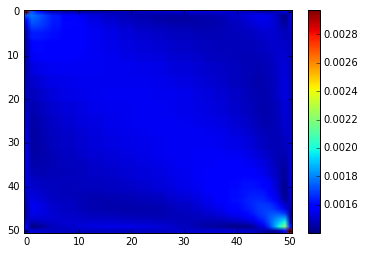

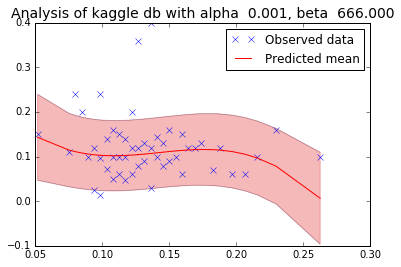

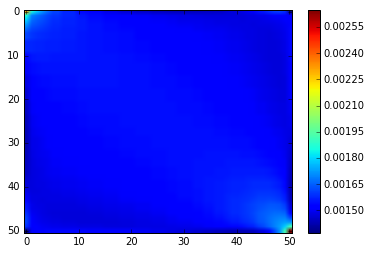

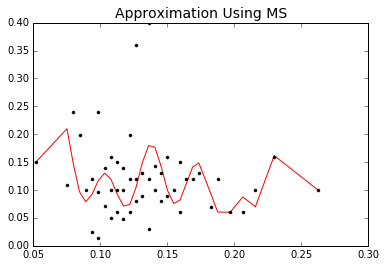

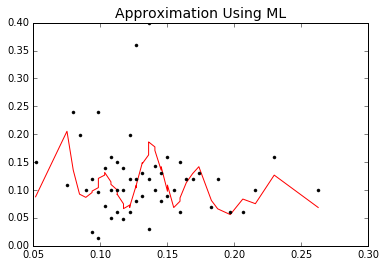

In [125]:
import pandas as pd
data = pd.read_csv("lab1-db/lab1.csv", sep=',', dtype={21: np.str, 57: np.str})


def getData(A, B):
    arr = np.array(data[A].values, dtype = np.float64)
    columns = arr.shape[0]
    arr = np.append(arr, data[B].values, axis=0)
    rows = arr.shape[0] // columns
    arr = arr.reshape(rows, columns)   
    X = arr.transpose()
    X = X[~np.isnan(X).any(axis=1)] # delete all rows that contain nan-values.
    X = X[np.lexsort(np.fliplr(X).T)]
    x = X[:,0]
    y = X[:,1]
    X = np.array(x).T
    Y = np.array(y).T
    return X, Y


def MAP_kaggle(X, yn, alpha, beta, LF):
    phi = gen_phi(X, np.amin(X), np.amax(X), LF)
    wmap = w_MAP(phi, yn, alpha, beta)
    mean, cov = predictive(alpha, beta, phi, wmap)
    ye = mnormal_rand(mean[:,0], cov + eps * np.eye(cov.shape[0]))
    plt.title('Analysis of kaggle db with alpha  %.3f, beta  %.3f' % (alpha, beta), fontsize = 14)
    plt.plot(X[:,0], yn, 'xb', label="Observed data")
    plotModel(X[:,0], ye, cov)
    plt.show()
    plt.imshow(cov, aspect='auto')
    plt.colorbar()
    plt.show()

xp, yp = getData('Age', 'ExpectedEarning')

s = len(xp)
xp = xp[0:s:s // 50]
yp = yp[0:s:s // 50]

xp = xp / np.linalg.norm(xp)
yp = yp / np.linalg.norm(yp)

# Using Map
XP = np.array([xp]).T
YP = np.array([yp]).T
MAP_kaggle(XP, YP, 1e-10, 666, 30)
MAP_kaggle(XP, YP, 1e-3, 666, 40)


# Using MS
phi = gen_phi(XP, 0, 1, 30, 0.01)
ye = W_ML(phi, YP)[0]
plt.title("Approximation Using MS", fontsize=14)
plt.plot(xp, ye, 'r')
plt.plot(xp, yp, '.k')
plt.show()

# Using ML
w2 = w_ML(phi, yp, 0.1)
sigma1 = beta_inv_ML(phi, yp, w2)
ye2 = compute_estimate_ML(phi, w2, sigma1)
plt.title("Approximation Using ML", fontsize=14)
plt.plot(xp, ye2, 'r')
plt.plot(xp, yp, '.k')
plt.show()

## Discusion

- Se verifico experimentalmente que los procedimientos basados en Minimos cuadrados, Maximum Likelihood y MAP llevan a resultados similares tal como se discutio en clase.

- La seccion de MAP es muy interesante ya que da una "vision" distinta del problema. Aunque se esten estimando parametros puntuales para W, se parte de un planteamiento bayesiano y ademas al usar una distribusion predictiva, se puede decir que tanta "certeza" se tiene sobre la prediccion de un dato.

- En la seccion de la practica con la base de datos de Kaggle, se noto la dificultad de predecir los datos. Usando minimos cuadrados y maximum likelihood se ve como la funcion trata de ajustarse a los datos lo mejor posible, pero usando MAP, se nota como favorece a la incertidumbre y sigue los datos de una manera mas *suave*